In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('student-mat.csv',sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [4]:
print("Dataset Overview")
print(df.info())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    objec

In [5]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std  

In [20]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [22]:
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
school: 2 unique values
sex: 2 unique values
age: 8 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Medu: 5 unique values
Fedu: 5 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
traveltime: 4 unique values
studytime: 4 unique values
failures: 4 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
famrel: 5 unique values
freetime: 5 unique values
goout: 5 unique values
Dalc: 5 unique values
Walc: 5 unique values
health: 5 unique values
absences: 34 unique values
G1: 17 unique values
G2: 17 unique values
G3: 18 unique values


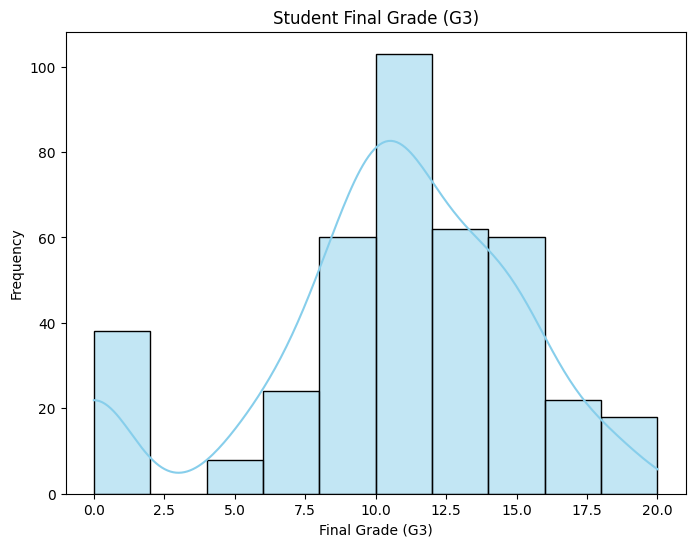

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title('Student Final Grade (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [45]:

#df_numeric = df.select_dtypes(include=['float64', 'int64'])


In [47]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
#plt.show()

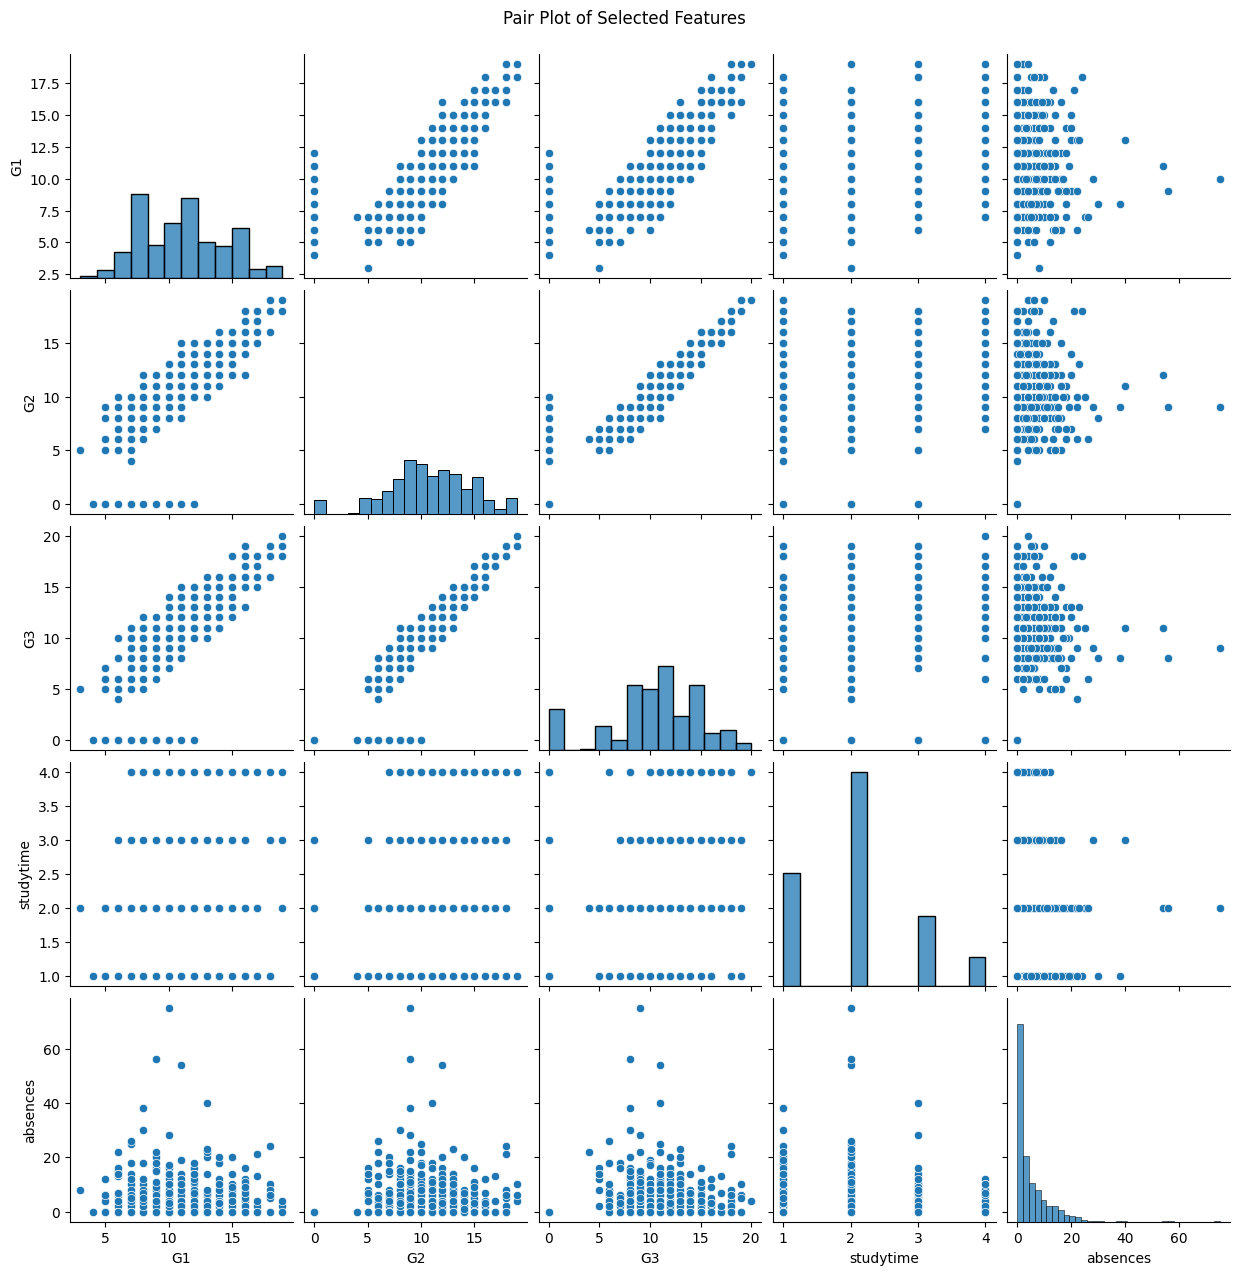

In [49]:
sns.pairplot(df[['G1', 'G2', 'G3', 'studytime', 'absences']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

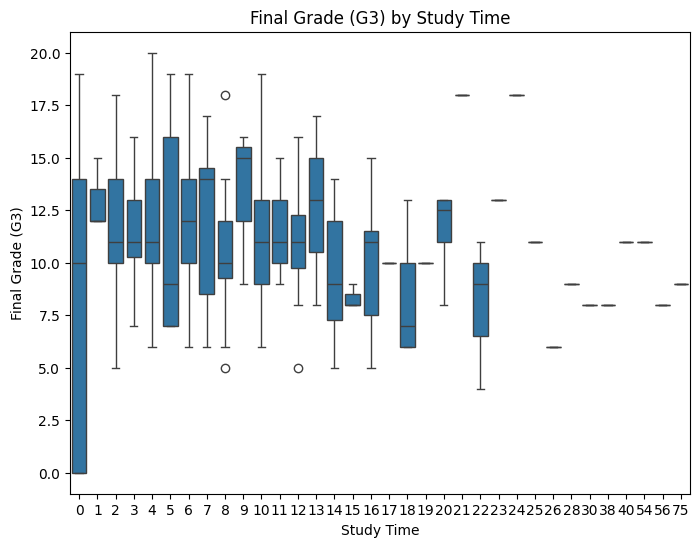

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='absences', y='G3', data=df)
plt.title('Final Grade (G3) by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

In [62]:
features = ['studytime', 'G1', 'G2', 'absences']
X = df[features]
y = df['G3']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4.178975406386835
R-squared: 0.7961977189442985


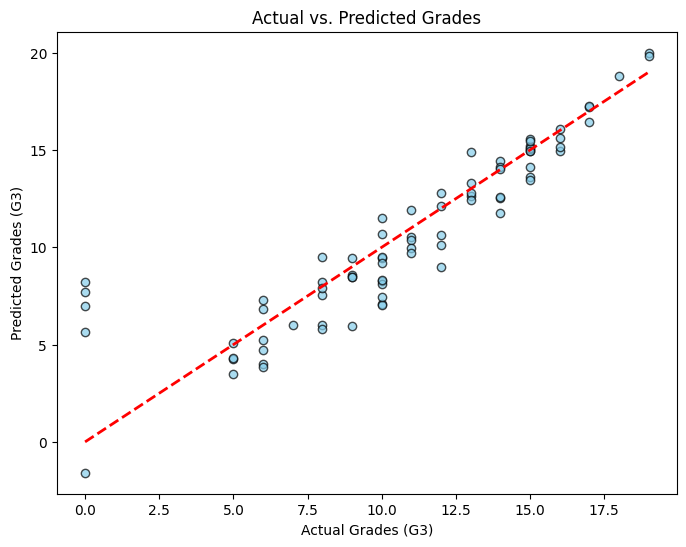

In [70]:
#Actual grade prediction vs predicted grades
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs. Predicted Grades')
plt.show()

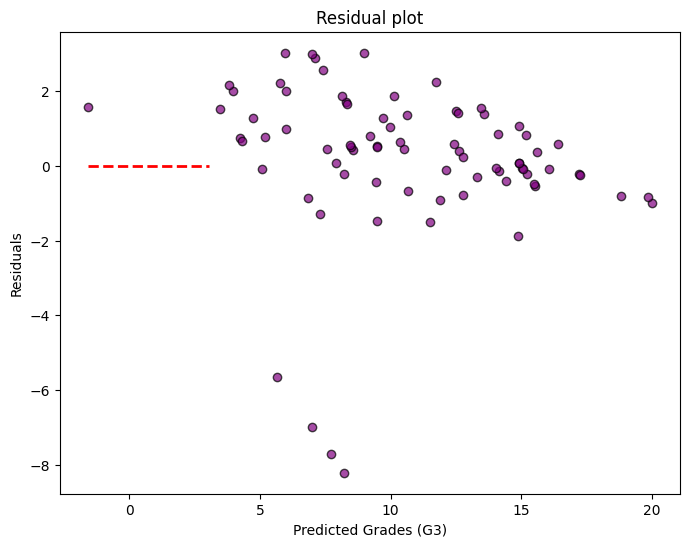

In [76]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.hlines(0, min(y_pred), max(residuals), color='red', linestyles= '--', lw=2)
plt.xlabel('Predicted Grades (G3)')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

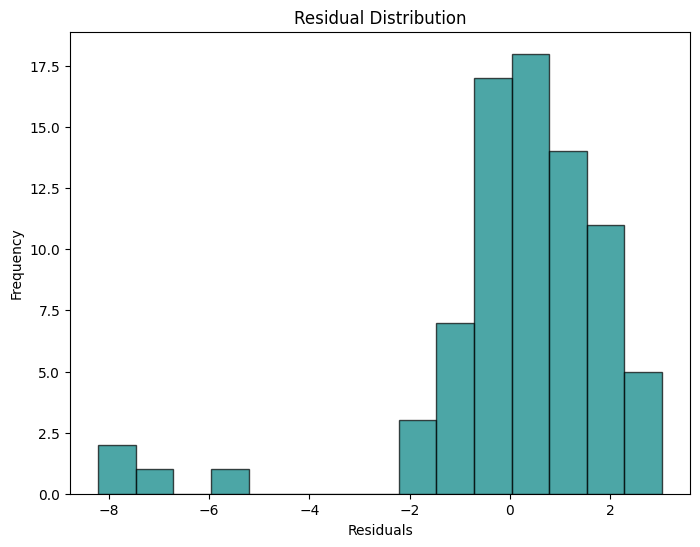

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()